# Prise en main des données / spectres

In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install umap-learn

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8.6, 6]
#plt.rcParams['figure.dpi'] = 100

## Lecture des données

In [2]:
df = pd.read_csv('data/spectre2020.csv.gz', index_col=0)
df.label = df.label.astype("category")
df

,350nm,351nm,352nm,353nm,354nm,355nm,356nm,357nm,358nm,359nm,...,1692nm,1693nm,1694nm,1695nm,1696nm,1697nm,1698nm,1699nm,1700nm,label
0,0.044483,0.043981,0.043597,0.043441,0.043974,0.043542,0.042239,0.042990,0.042473,0.041668,...,0.442687,0.441554,0.440527,0.439593,0.438735,0.438007,0.437308,0.436695,0.436071,Temoin
1,0.054652,0.054295,0.054536,0.054042,0.053745,0.053282,0.052612,0.052399,0.051399,0.050750,...,0.511475,0.510015,0.508672,0.507443,0.506309,0.505330,0.504374,0.503532,0.502659,Jaunisse
2,0.045393,0.045598,0.046701,0.044629,0.045420,0.046546,0.046229,0.045415,0.044490,0.044121,...,0.521380,0.520246,0.519220,0.518279,0.517429,0.516742,0.516064,0.515456,0.514852,Temoin
3,0.057475,0.056810,0.057082,0.057069,0.056692,0.056019,0.055394,0.055492,0.055015,0.054271,...,0.460088,0.458711,0.457433,0.456288,0.455238,0.454329,0.453456,0.452712,0.451936,Jaunisse
4,0.052844,0.053511,0.053376,0.051248,0.051844,0.052192,0.051114,0.051468,0.051949,0.051978,...,0.553238,0.552267,0.551409,0.550730,0.550091,0.549553,0.549057,0.548668,0.548248,Esca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0.054969,0.054641,0.054407,0.053844,0.053448,0.053270,0.053293,0.053520,0.053116,0.052630,...,0.571514,0.570220,0.569038,0.567971,0.566978,0.566150,0.565324,0.564564,0.563800,Enroulement
1910,0.055020,0.054664,0.054657,0.054304,0.053605,0.053120,0.053078,0.053160,0.052282,0.051473,...,0.530099,0.528802,0.527602,0.526504,0.525486,0.524616,0.523757,0.522995,0.522196,Jaunisse
1911,0.057555,0.057545,0.058070,0.057497,0.056898,0.056073,0.055214,0.055289,0.055062,0.054679,...,0.435338,0.433920,0.432626,0.431448,0.430364,0.429442,0.428549,0.427777,0.426968,Jaunisse
1912,0.053925,0.053901,0.054246,0.054599,0.054603,0.053716,0.052542,0.053287,0.052704,0.051768,...,0.512926,0.511648,0.510478,0.509452,0.508486,0.507644,0.506812,0.506044,0.505287,Esca


In [3]:
df.describe()

,350nm,351nm,352nm,353nm,354nm,355nm,356nm,357nm,358nm,359nm,...,1691nm,1692nm,1693nm,1694nm,1695nm,1696nm,1697nm,1698nm,1699nm,1700nm
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,...,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,0.051170,0.051074,0.051378,0.051004,0.050822,0.050373,0.049800,0.050344,0.049908,0.049404,...,0.496611,0.495290,0.494095,0.493007,0.492045,0.491150,0.490385,0.489649,0.489005,0.488343
std,0.006634,0.006623,0.006601,0.006624,0.006627,0.006633,0.006640,0.006632,0.006637,0.006644,...,0.047756,0.047732,0.047709,0.047688,0.047669,0.047651,0.047634,0.047618,0.047604,0.047589
min,0.033341,0.032898,0.033562,0.034048,0.034502,0.033931,0.032467,0.033135,0.032469,0.032405,...,0.347387,0.346272,0.345302,0.344419,0.343655,0.342936,0.342313,0.341739,0.341261,0.340749
25%,0.046476,0.046440,0.046738,0.046469,0.046291,0.045859,0.045206,0.045828,0.045357,0.044882,...,0.466599,0.465320,0.464140,0.463153,0.462183,0.461218,0.460492,0.459812,0.459201,0.458467
50%,0.050422,0.050425,0.050726,0.050124,0.049987,0.049651,0.049055,0.049593,0.049204,0.048757,...,0.495885,0.494514,0.493252,0.492105,0.491028,0.490104,0.489336,0.488623,0.488022,0.487364
75%,0.054981,0.054768,0.055104,0.054735,0.054574,0.054096,0.053490,0.054009,0.053582,0.053007,...,0.525972,0.524630,0.523382,0.522178,0.521131,0.520219,0.519458,0.518583,0.517916,0.517231
max,0.090959,0.090688,0.090008,0.089856,0.089602,0.089054,0.088812,0.090077,0.089546,0.089975,...,0.705288,0.705064,0.705016,0.705045,0.705221,0.705449,0.705780,0.706149,0.706631,0.707088


In [4]:
df.label.describe()

count         1914
unique           4
top       Jaunisse
freq           729
Name: label, dtype: object

In [5]:
df.label.cat.categories, df.label.cat.codes

(Index(['Enroulement', 'Esca', 'Jaunisse', 'Temoin'], dtype='object'),
 0       3
 1       2
 2       3
 3       2
 4       1
        ..
 1909    0
 1910    2
 1911    2
 1912    1
 1913    2
 Length: 1914, dtype: int8)

<BarContainer object of 4 artists>

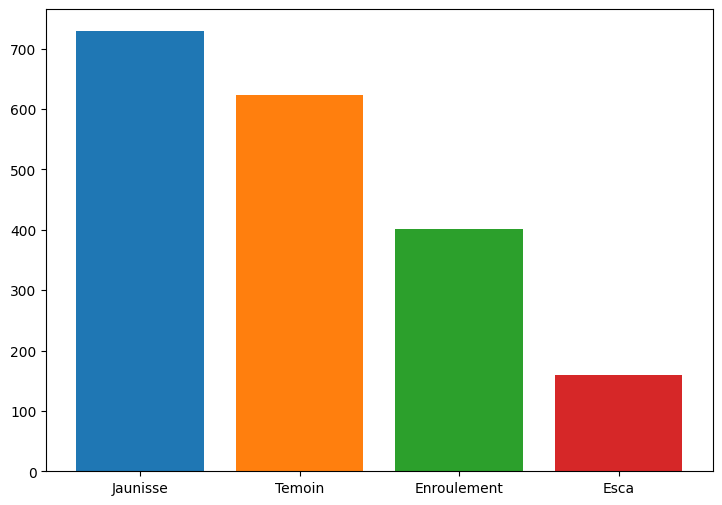

In [6]:
cnts = df.label.value_counts()
plt.bar(cnts.index, cnts, color=np.array(plt.rcParams['axes.prop_cycle'].by_key()['color']))

In [7]:
# Conversion idx <-> label pour simplifier les manipulations
idx2lbl = dict(enumerate(df.label.cat.categories))
lbl2idx = {v:k for k,v in idx2lbl.items()}
# Couleur selon la catégorie
lblcol = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
cats = np.array(df.label.cat.categories)
idx2lbl, lbl2idx

({0: 'Enroulement', 1: 'Esca', 2: 'Jaunisse', 3: 'Temoin'},
 {'Enroulement': 0, 'Esca': 1, 'Jaunisse': 2, 'Temoin': 3})

In [8]:
X = df.iloc[:,:-1].to_numpy()                            # spectres
Y = df.label.cat.codes.to_numpy(dtype=int)                        # code catégorie
lam = np.asarray([int(x[:-2]) for x in df.columns[:-1]]) # longueurs d'onde
X, Y, lam

(array([[0.044483, 0.043981, 0.043597, ..., 0.437308, 0.436695, 0.436071],
        [0.054652, 0.054295, 0.054536, ..., 0.504374, 0.503532, 0.502659],
        [0.045393, 0.045598, 0.046701, ..., 0.516064, 0.515456, 0.514852],
        ...,
        [0.057555, 0.057545, 0.05807 , ..., 0.428549, 0.427777, 0.426968],
        [0.053925, 0.053901, 0.054246, ..., 0.506812, 0.506044, 0.505287],
        [0.061303, 0.061147, 0.060652, ..., 0.459942, 0.459214, 0.458452]]),
 array([3, 2, 3, ..., 2, 1, 2]),
 array([ 350,  351,  352, ..., 1698, 1699, 1700]))

## Affichage des spectres

### Version brute

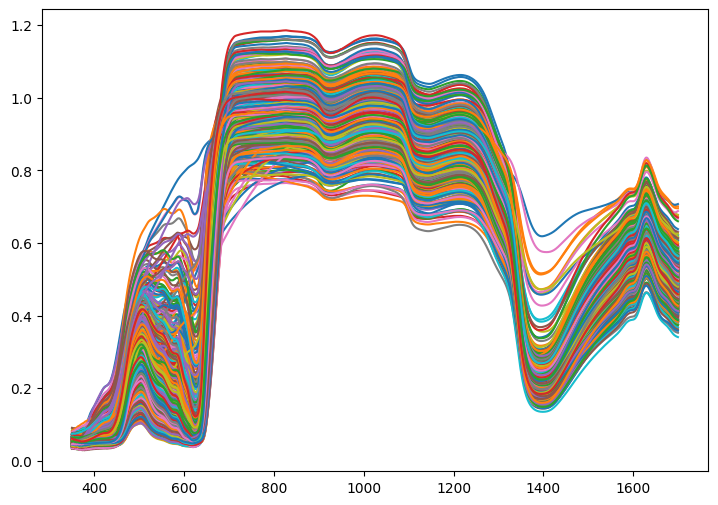

In [9]:
plt.plot(lam, X.T)
pass

### Version groupée

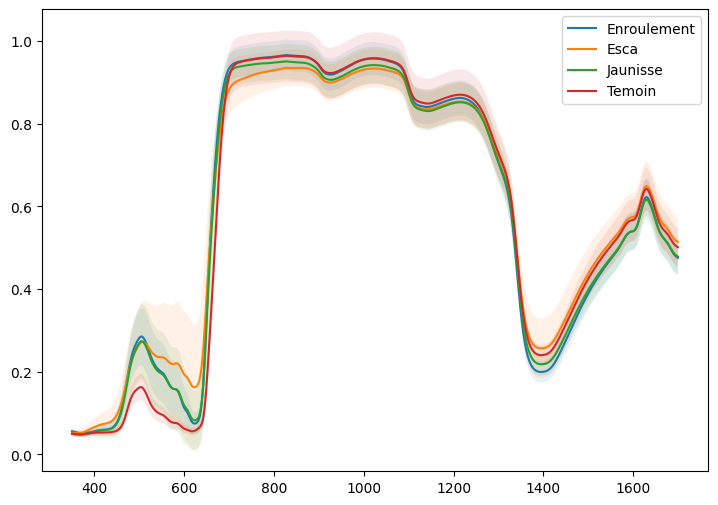

In [10]:
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    mean = np.mean(X[obs,:], axis=0)
    std = np.std(X[obs,:], axis=0)
    plt.plot(lam, mean, label=lbl)
    plt.fill_between(lam, mean-std, mean+std, alpha=.1)
plt.legend()
pass

## Réduction de dimension

### PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(f'Proportion variance expliquée par axe: {pca.explained_variance_ratio_}')
print(f'Total de la proportion de la variance expliquée: {pca.explained_variance_ratio_.sum()}')

Proportion variance expliquée par axe: [0.45164355 0.39029297]
Total de la proportion de la variance expliquée: 0.8419365167900819


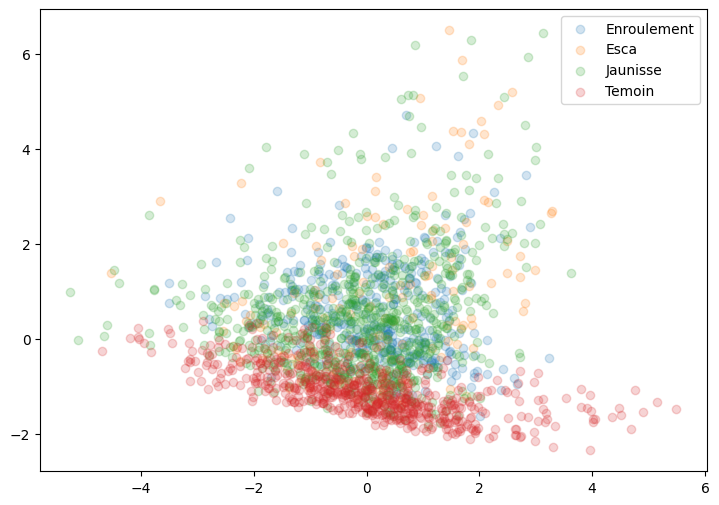

In [12]:
X2 = pca.transform(X) # On pourrait faire fit_transform directement
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl, alpha=.2)
plt.legend()
pass

### UMAP

/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


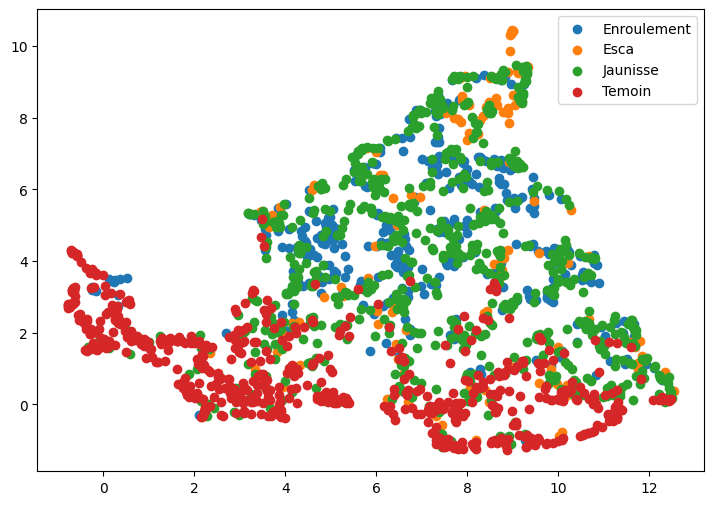

In [13]:
from umap import UMAP
reducer = UMAP()
reducer.fit(X)
X2 = reducer.transform(X)
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl)
plt.legend()
pass

# Prétraitement Standard Normal Variate (SNV)

In [14]:
Xsnv = X - np.mean(X, axis=1, keepdims=True)
Xsnv /= np.std(X, axis=1, keepdims=True)

## Affichage des spectres

### Version brute

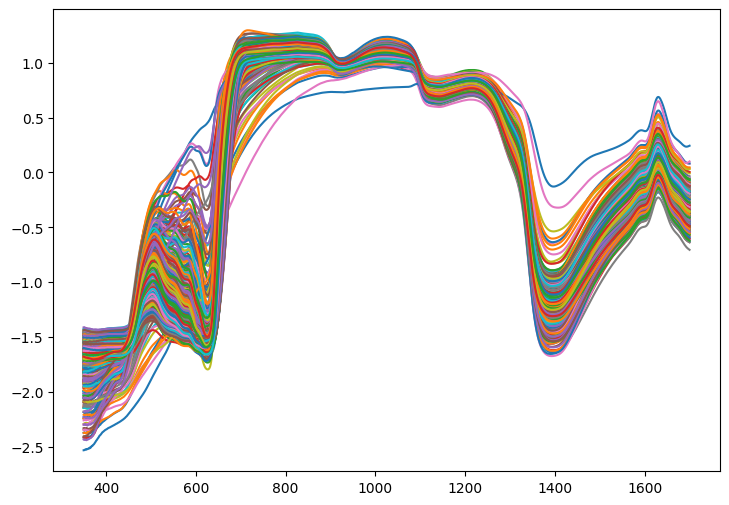

In [15]:
plt.plot(lam, Xsnv.T)
pass

### Version groupée

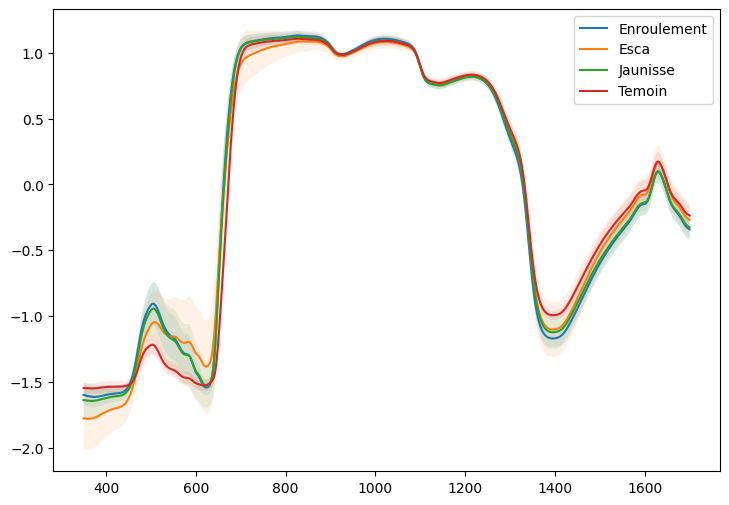

In [16]:
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    mean = np.mean(Xsnv[obs,:], axis=0)
    std = np.std(Xsnv[obs,:], axis=0)
    plt.plot(lam, mean, label=lbl)
    plt.fill_between(lam, mean-std, mean+std, alpha=.1)
plt.legend()
pass

## Réduction de dimension

### PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xsnv)
print(f'Proportion variance expliquée par axe: {pca.explained_variance_ratio_}')
print(f'Total de la proportion de la variance expliquée: {pca.explained_variance_ratio_.sum()}')

Proportion variance expliquée par axe: [0.73799079 0.14474438]
Total de la proportion de la variance expliquée: 0.8827351745713645


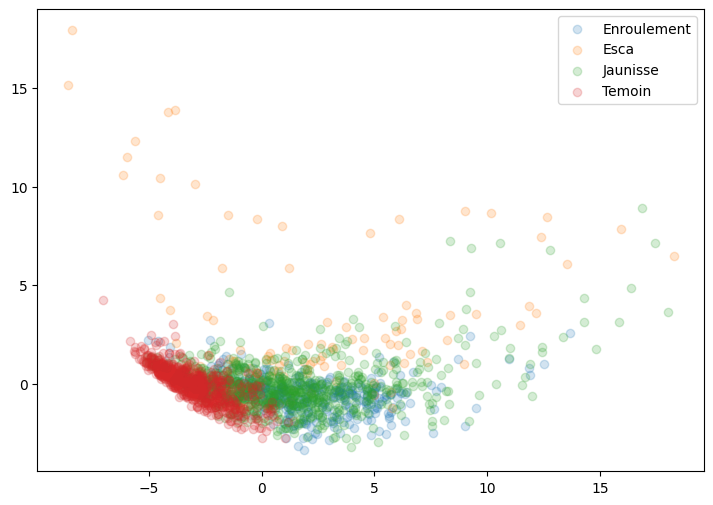

In [18]:
X2 = pca.transform(Xsnv) # On pourrait faire fit_transform directement
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl, alpha=.2)
plt.legend()
pass

### UMAP

/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


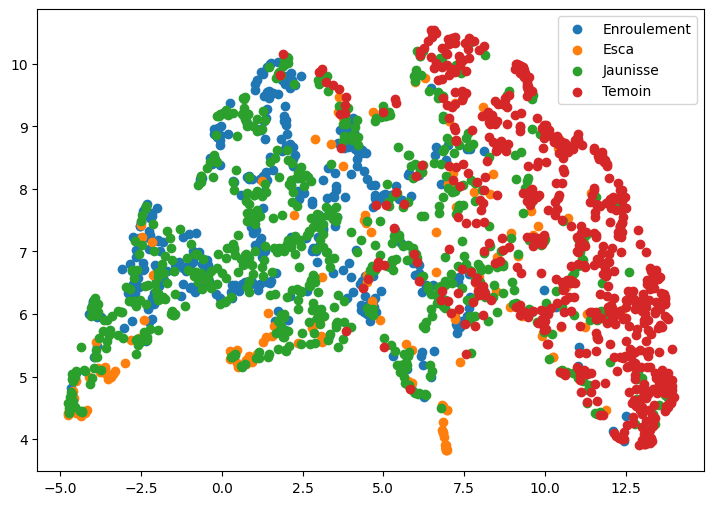

In [19]:
reducer = UMAP()
reducer.fit(Xsnv)
X2 = reducer.transform(Xsnv)
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl)
plt.legend()
pass

# Prétraitement Multiplicative Scattering Correction (MSC)

In [20]:
Xmsc = X - np.mean(X, axis=1, keepdims=True)
ref = Xmsc.mean(axis=0)
fit = np.polyfit(ref, Xmsc.T, 1)
Xmsc = (Xmsc - fit[1,:,None]) / fit[0,:,None]

## Affichage des spectres

### Version brute

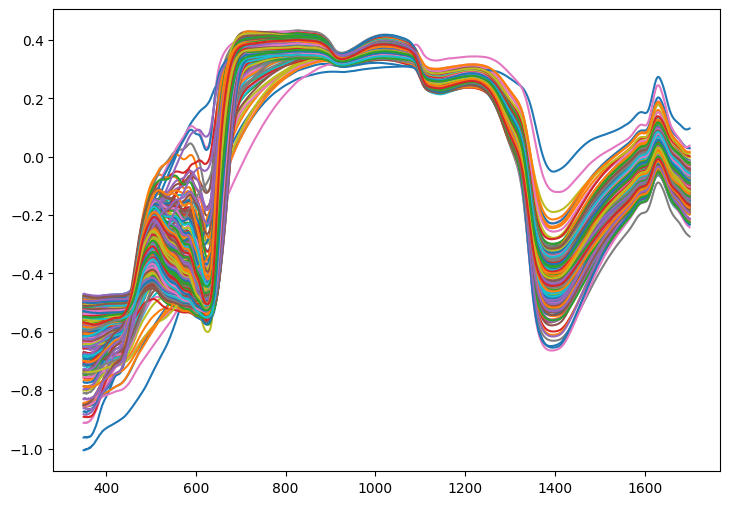

In [21]:
plt.plot(lam, Xmsc.T)
pass

### Version groupée

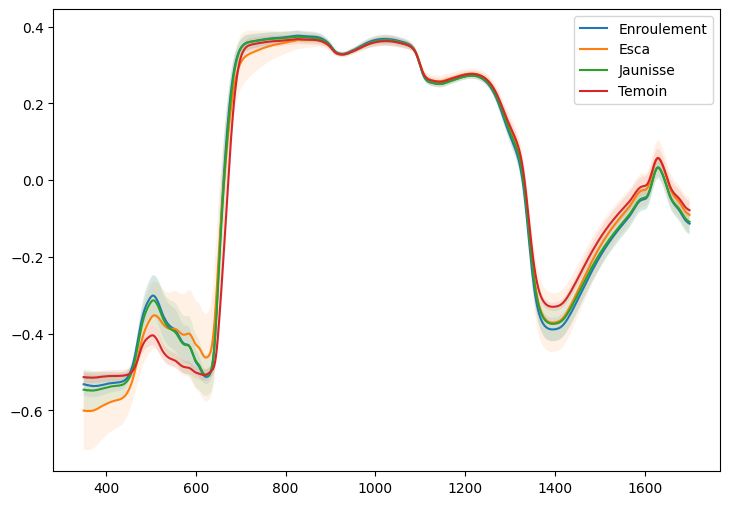

In [22]:
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    mean = np.mean(Xmsc[obs,:], axis=0)
    std = np.std(Xmsc[obs,:], axis=0)
    plt.plot(lam, mean, label=lbl)
    plt.fill_between(lam, mean-std, mean+std, alpha=.1)
plt.legend()
pass

## Réduction de dimension

### PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xmsc)
print(f'Proportion variance expliquée par axe: {pca.explained_variance_ratio_}')
print(f'Total de la proportion de la variance expliquée: {pca.explained_variance_ratio_.sum()}')

Proportion variance expliquée par axe: [0.74116111 0.14638924]
Total de la proportion de la variance expliquée: 0.8875503522240153


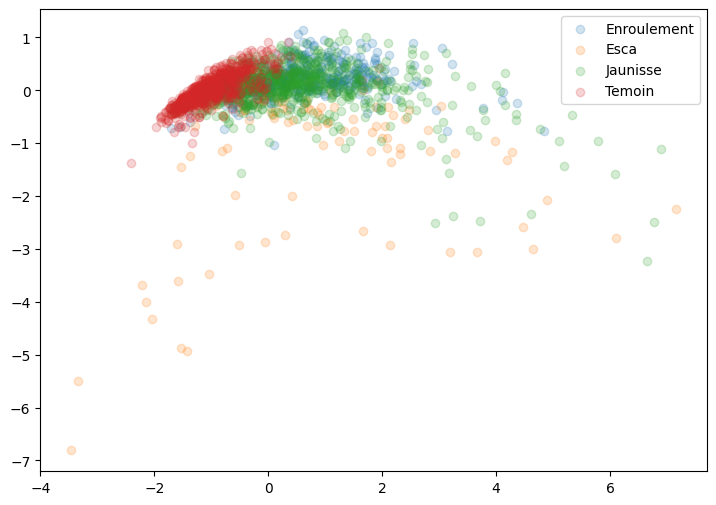

In [24]:
X2 = pca.transform(Xmsc) # On pourrait faire fit_transform directement
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl, alpha=.2)
plt.legend()
pass

### UMAP

/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


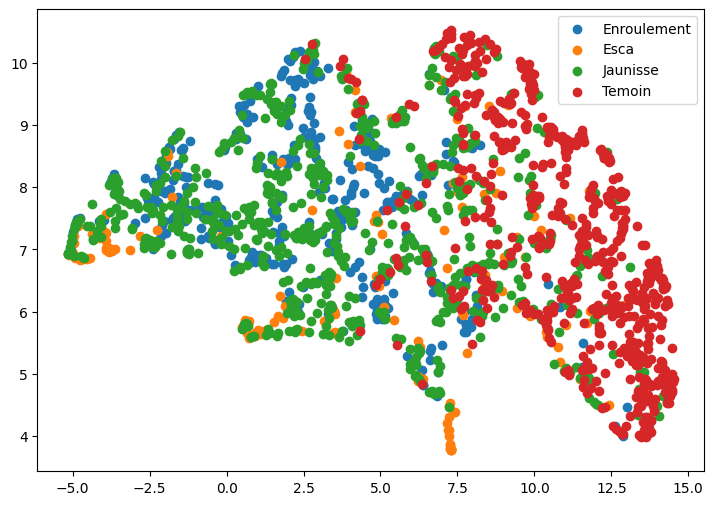

In [25]:
reducer = UMAP()
reducer.fit(Xmsc)
X2 = reducer.transform(Xmsc)
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl)
plt.legend()
pass

# Prétraitement l-1

In [26]:
Xl1 = X / np.sum(X, axis=1, keepdims=True)

## Affichage des spectres

### Version brute

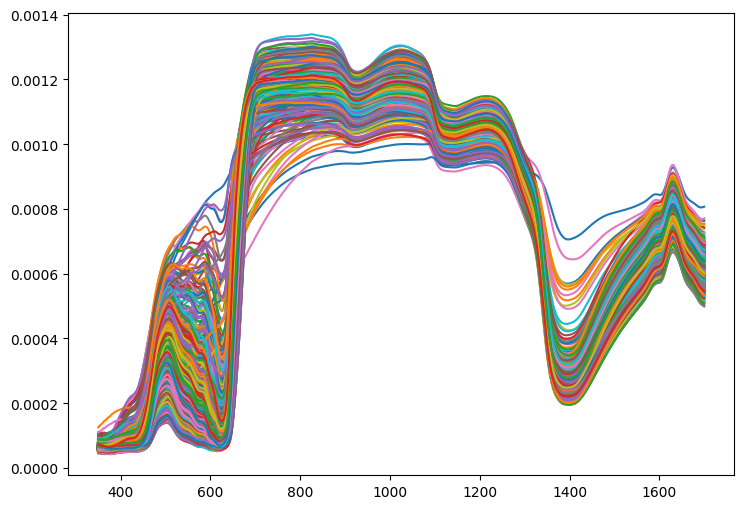

In [27]:
plt.plot(lam, Xl1.T)
pass

### Version groupée

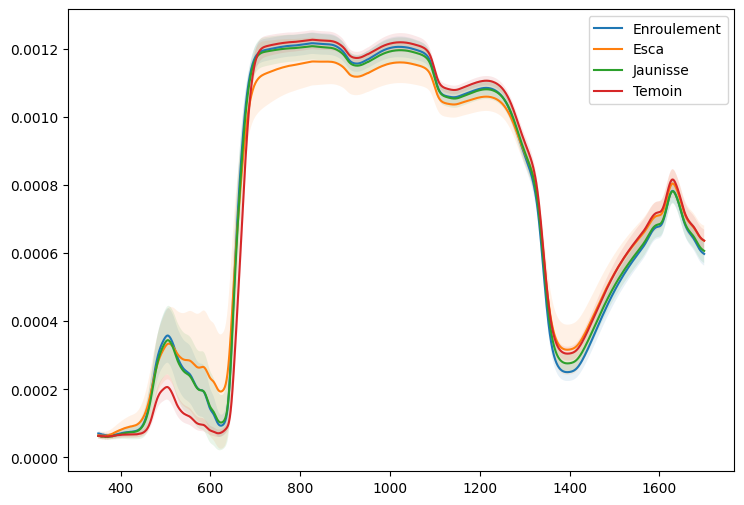

In [28]:
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    mean = np.mean(Xl1[obs,:], axis=0)
    std = np.std(Xl1[obs,:], axis=0)
    plt.plot(lam, mean, label=lbl)
    plt.fill_between(lam, mean-std, mean+std, alpha=.1)
plt.legend()
pass

## Réduction de dimension

### PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xl1)
print(f'Proportion variance expliquée par axe: {pca.explained_variance_ratio_}')
print(f'Total de la proportion de la variance expliquée: {pca.explained_variance_ratio_.sum()}')

Proportion variance expliquée par axe: [0.69333616 0.22632256]
Total de la proportion de la variance expliquée: 0.9196587227917522


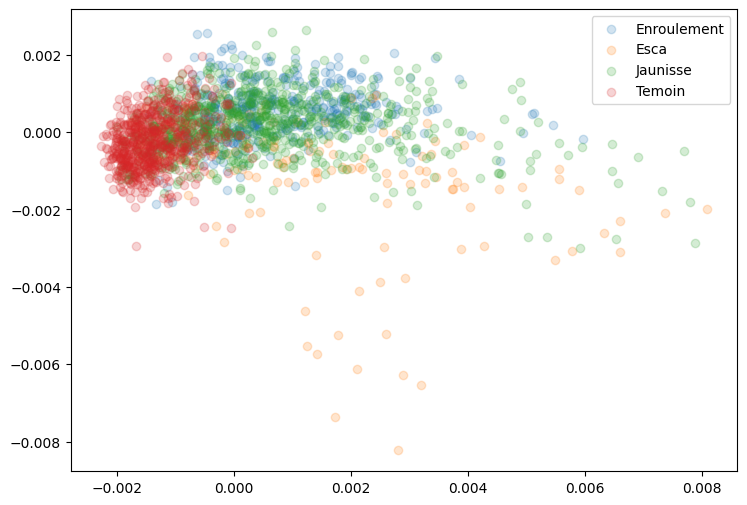

In [30]:
X2 = pca.transform(Xl1) # On pourrait faire fit_transform directement
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl, alpha=.2)
plt.legend()
pass

### UMAP

/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/goupil/Documents/presentations/2025/jc-fare-2025/notebooks/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


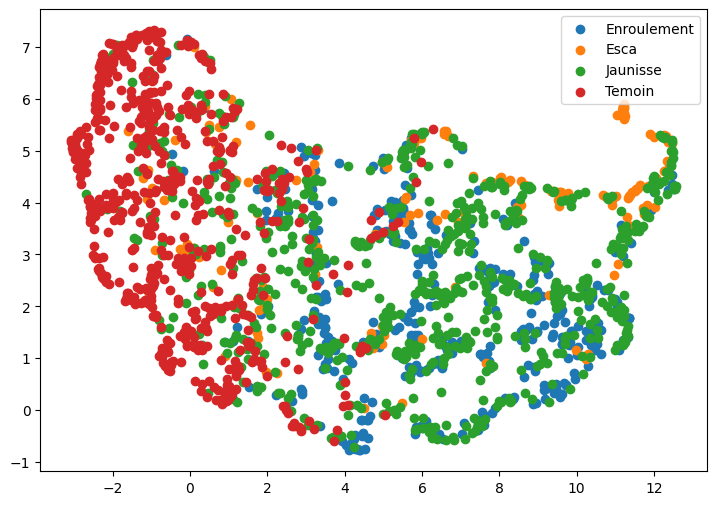

In [31]:
reducer = UMAP()
reducer.fit(Xl1)
X2 = reducer.transform(Xl1)
for idx, lbl in idx2lbl.items():
    obs = Y == idx
    plt.scatter(X2[obs,0], X2[obs,1], c=lblcol[idx], label=lbl)
plt.legend()
pass